In [38]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#CSV Files to Load
clinical_trial_data = "Pyma_clinicaltrial_data.csv"
mouse_drug_data = "Pyma_mouse_drug_data.csv"

# Read the Mouse/Drug Data and the Clinical Trial Data
clinical_trial_df = pd.read_csv(clinical_trial_data)
clinical_trial_df.head()

mouse_drug_data_df = pd.read_csv(mouse_drug_data)
mouse_drug_data_df.head()

# Combine the data into a single dataset
mouse_drug_trial_df = pd.merge(clinical_trial_df, mouse_drug_data_df, how='left',on='Mouse ID')

# Display data table for preview
mouse_drug_trial_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [39]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint and convert to DataFrame
tumor_response = mouse_drug_trial_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

mean_tumor_vol = pd.DataFrame(tumor_response)
mean_tumor_vol = mean_tumor_vol.reset_index()
mean_tumor_vol

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [40]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stnd_error_tumor_vol = mouse_drug_trial_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
stnd_error_tumor_vol = pd.DataFrame(stnd_error_tumor_vol)
stnd_error_tumor_vol = stnd_error_tumor_vol.reset_index()

stnd_error_tumor_vol.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [41]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_vol_pivot = mean_tumor_vol.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

mean_tumor_vol_pivot = pd.DataFrame(mean_tumor_vol_pivot)

mean_tumor_vol_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [42]:
# Minor Data Munging to Re-Format the Data Frames
stnd_error_tumor_vol_pivot = stnd_error_tumor_vol.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

stnd_error_tumor_vol_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


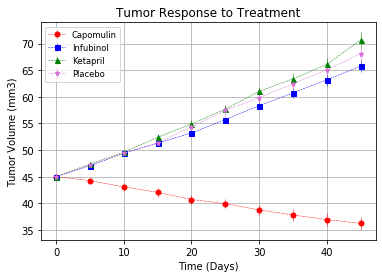

In [43]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Capomulin"], yerr=stnd_error_tumor_vol_pivot["Capomulin"], 
             color="red", label="Capomulin", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Infubinol"], yerr=stnd_error_tumor_vol_pivot["Infubinol"], 
             color="blue", label="Infubinol", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Ketapril"], yerr=stnd_error_tumor_vol_pivot["Ketapril"], 
             color="green", label="Ketapril", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_tumor_vol_pivot.index, mean_tumor_vol_pivot["Placebo"], yerr=stnd_error_tumor_vol_pivot["Placebo"], 
             color="orchid", label="Placebo", marker="*", markersize=5, linestyle="dashed", linewidth=0.50)


plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.legend(loc = "best", fontsize = "small", fancybox = True)

# Save the Figure and Display
plt.savefig("tumor_response.png")
plt.show()

## Metastatic Response to Treatment

In [44]:
# Store the Mean Metastatic Site Data Grouped by Drug and Timepoint 
metastatic_response = mouse_drug_trial_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
mean_metastatic_response = pd.DataFrame(metastatic_response)

mean_metastatic_response.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [45]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stnd_error_metastatic_response = mouse_drug_trial_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
stnd_error_metastatic_response = pd.DataFrame(stnd_error_metastatic_response)

stnd_error_metastatic_response.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [46]:
#Store the Mean of Metastatic Sites Grouped by Drug and Timepoint
mean_metastatic_response = mean_metastatic_response.reset_index()

mean_metastatic_response_pivot = mean_metastatic_response.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

mean_metastatic_response_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [47]:
#Store the Standard Error of Metastatic Sites Grouped by Drug and Timepoint
stnd_error_metastatic_response= stnd_error_metastatic_response.reset_index()
stnd_error_metastatic_response_pivot=stnd_error_metastatic_response.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

stnd_error_metastatic_response_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


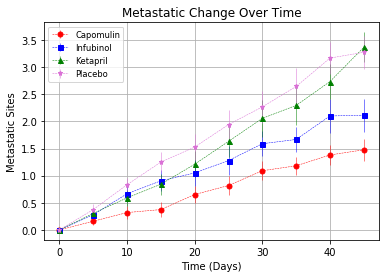

In [48]:
# Generate the Plot (with Error Bars)

plt.errorbar(mean_metastatic_response_pivot.index, mean_metastatic_response_pivot["Capomulin"], 
             yerr=stnd_error_metastatic_response_pivot["Capomulin"], color="red", label="Capomulin", marker="o", 
             markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_metastatic_response_pivot.index, mean_metastatic_response_pivot["Infubinol"], 
              yerr=stnd_error_metastatic_response_pivot["Infubinol"], color="blue", label="Infubinol", marker="s", 
             markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_metastatic_response_pivot.index, mean_metastatic_response_pivot["Ketapril"], 
             yerr=stnd_error_metastatic_response_pivot["Ketapril"], color="green", label="Ketapril", marker="^", 
             markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_metastatic_response_pivot.index, mean_metastatic_response_pivot["Placebo"], 
             yerr=stnd_error_metastatic_response_pivot["Placebo"], color="orchid", label="Placebo", marker="*", 
             markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Change Over Time")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.grid(True)
plt.legend(loc = "best", fontsize = "small", fancybox = True)

# Save the Figure and display
plt.savefig("metastatic_change.png")
plt.show()

## Survival Rates

In [57]:
# Store the Count of Mice Grouped by Drug and Timepoint
mouse_survival_rates = mouse_drug_trial_df.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]

#Reset the df for better display
mouse_survival_rates = mouse_survival_rates.reset_index()

#Rename the column Mouse ID to Mouse Count
mouse_survival_rates = mouse_survival_rates.rename(columns={"Mouse ID": "Mouse Count"})

#Create new DF
stnd_error_mouse_survival = pd.DataFrame(mouse_survival_rates)
stnd_error_mouse_survival = stnd_error_mouse_survival.reset_index()

#stnd_error_mouse_survival.head()

mouse_survival_rates = pd.DataFrame(mouse_survival_rates)
mouse_survival_rates.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [58]:
# Minor Data Munging to Re-Format the Data Frames
stnd_error_mouse_survival = stnd_error_mouse_survival.reset_index()

stnd_error_mouse_survival_pivot =stnd_error_mouse_survival.pivot(index="Timepoint", columns="Drug", values="Mouse Count")

stnd_error_mouse_survival_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


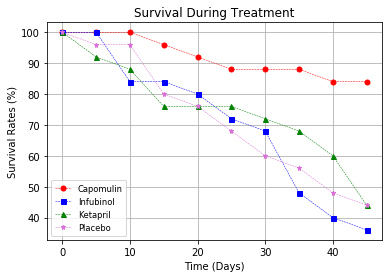

In [59]:
# Generate the Plot (Accounting for percentages)

plt.plot(100 * stnd_error_mouse_survival_pivot["Capomulin"] / 25, color="red", label="Capomulin", marker="o", 
         markersize=5, linestyle="dashed", linewidth=0.50)
plt.plot(100 * stnd_error_mouse_survival_pivot["Infubinol"] / 25, color="blue",label="Infubinol", marker="s", 
         markersize=5, linestyle="dashed", linewidth=0.50)
plt.plot(100 * stnd_error_mouse_survival_pivot["Ketapril"] / 25, color="green", label="Ketapril", marker="^", 
         markersize=5, linestyle="dashed", linewidth=0.50)
plt.plot(100 * stnd_error_mouse_survival_pivot["Placebo"] / 25, color="orchid", label="Placebo", marker="*", 
         markersize=5, linestyle="dashed", linewidth=0.50)
    

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rates (%)")
plt.grid(True)
plt.legend(loc = "best", fontsize = "small", fancybox = True)

# Save the Figure and display
plt.savefig("survival_rates.png")
plt.show()

## Summary Bar Graph

In [60]:
# Calculate the percent changes for each drug
drug_percent_change = (mean_tumor_vol_pivot.loc[45] - mean_tumor_vol_pivot.loc[0]) / mean_tumor_vol_pivot.loc[0] * 100

# Display the data to confirm
drug_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

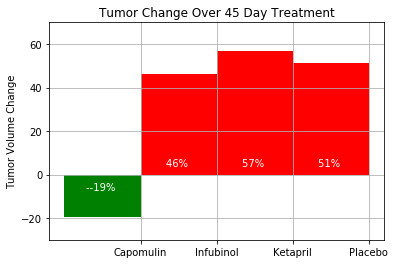

In [61]:
# Store all Relevant Percent Changes into a Tuple
percent_change_tuple = (drug_percent_change["Capomulin"],
                        drug_percent_change["Infubinol"],
                        drug_percent_change["Ketapril"],
                        drug_percent_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(percent_change_tuple))
width = 1
passRects = ax.bar(ind[0], percent_change_tuple[0], width, color = "green")
failRects = ax.bar(ind[1:], percent_change_tuple[1:], width, color = "red")

# Orient widths. Add labels, tick marks, etc. 
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("Tumor Volume Change")
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(["Capomulin", "Infubinol", "Ketapril", "Placebo"])
ax.set_autoscaley_on(False)
ax.set_ylim([-30, 70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 3, '%d%% ' % int(height), 
                ha = 'center', va = 'bottom', color = "white")
        
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., -8, '-%d%% ' % int(height), 
                ha = 'center', va = 'bottom', color = "white")

# Call functions to implement the function calls
autolabelPass(passRects)
autolabelFail(failRects)

# Save the Figure and display
fig.savefig("percentage_drug_change.png")
fig.show()